1.  Load Cleaned Data

In [1]:
import pandas as pd

# Replace with the path to your file if it's in a different location
df = pd.read_csv("Cleaned_EV_Charging_Sessions.csv")

# Quick check
print(f"✅ Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()
df = df.drop(columns=['_id'], errors='ignore')  # If it exists
required_features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
print("✅ Features available:", all(f in df.columns for f in required_features))


✅ Loaded 3395 rows and 29 columns
✅ Features available: True


2. Select Features + Scale

In [2]:
from sklearn.preprocessing import StandardScaler

features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
df = df.dropna(subset=features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


3.Train KMeans

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Prevent MKL memory leak warning on Windows

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# Ensure clean feature data
features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
df = df.dropna(subset=features)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)


C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4.  Train DBSCAN

In [5]:
from sklearn.cluster import DBSCAN

# Use tuned parameters
dbscan_updated = DBSCAN(eps=1.2, min_samples=5)
df['dbscan_cluster'] = dbscan_updated.fit_predict(X_scaled)
print("✅ DBSCAN cluster labels added:", df['dbscan_cluster'].unique())


✅ DBSCAN cluster labels added: [ 0 -1  1  2]


5. Kmeans visualization

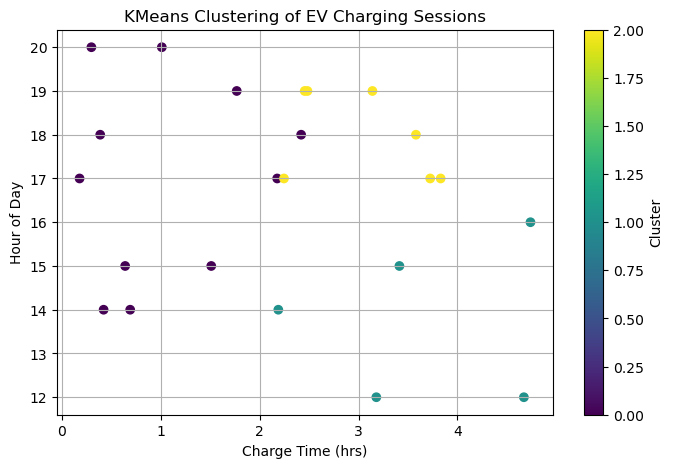

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['chargeTimeHrs'], df['hour'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel("Charge Time (hrs)")
plt.ylabel("Hour of Day")
plt.title("KMeans Clustering of EV Charging Sessions")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

6. DBSCAN cluster visualization

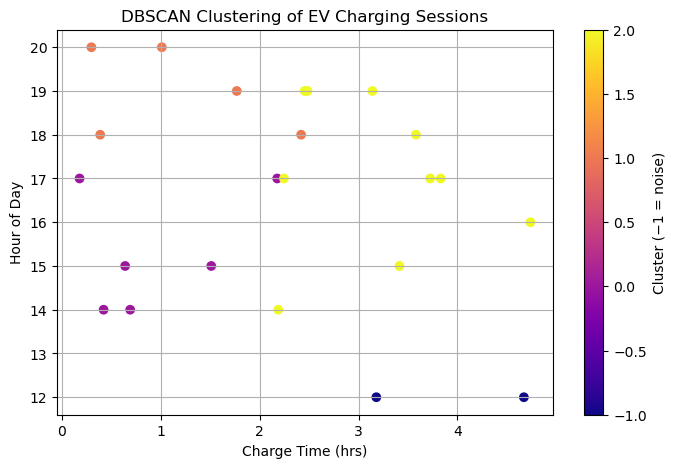

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(df['chargeTimeHrs'], df['hour'], c=df['dbscan_cluster'], cmap='plasma')
plt.xlabel("Charge Time (hrs)")
plt.ylabel("Hour of Day")
plt.title("DBSCAN Clustering of EV Charging Sessions")
plt.colorbar(label="Cluster (−1 = noise)")
plt.grid(True)
plt.show()


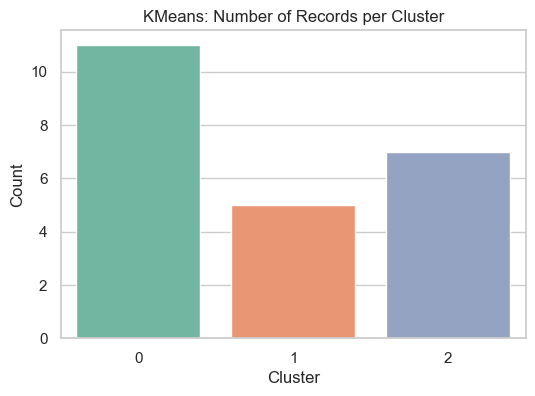

In [15]:
import seaborn as sns

# Set figure size and style
sns.set(style="whitegrid")

# 1. Bar plot: KMeans Cluster Sizes
plt.figure(figsize=(6, 4))
sns.countplot(x='kmeans_cluster', data=df, palette='Set2')
plt.title("KMeans: Number of Records per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()



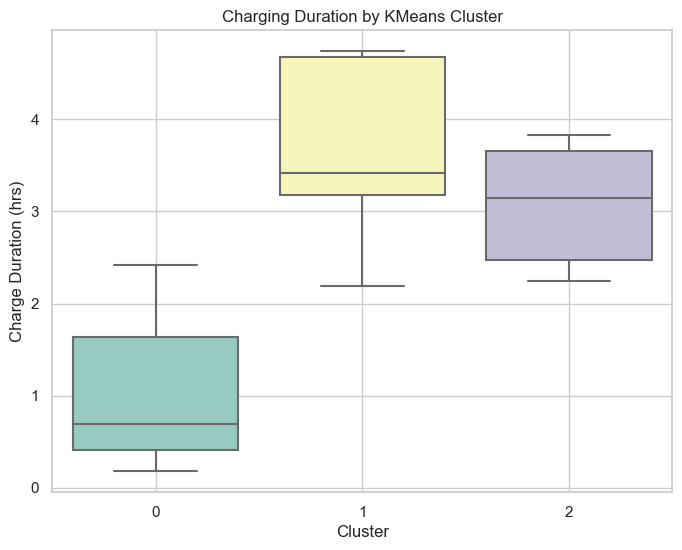

In [17]:
# 2. Box plot: Charge Duration per KMeans Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='kmeans_cluster', y='chargeTimeHrs', data=df, palette='Set3')
plt.title("Charging Duration by KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("Charge Duration (hrs)")
plt.grid(True)
plt.show()


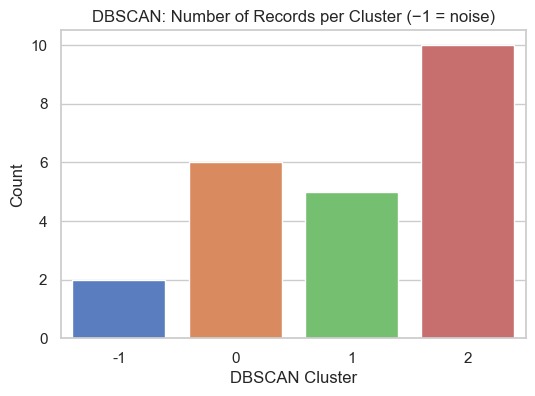

In [19]:
# 3. DBSCAN Cluster Distribution (including noise)
plt.figure(figsize=(6, 4))
sns.countplot(x='dbscan_cluster', data=df, palette='muted')
plt.title("DBSCAN: Number of Records per Cluster (−1 = noise)")
plt.xlabel("DBSCAN Cluster")
plt.ylabel("Count")
plt.show()




In [20]:

# 4. Summary Table for KMeans Clusters
kmeans_summary = df.groupby('kmeans_cluster')[['chargeTimeHrs', 'hour', 'isWeekend', 'distance']].agg(['mean', 'median']).round(2)

# 5. Summary Table for DBSCAN Clusters
dbscan_summary = df.groupby('dbscan_cluster')[['chargeTimeHrs', 'hour', 'isWeekend', 'distance']].agg(['mean', 'median']).round(2)

# Display summaries
# Display the cluster summaries using pandas display
print(" KMeans Cluster Summary:")
display(kmeans_summary)

print("\n DBSCAN Cluster Summary:")
display(dbscan_summary)

 KMeans Cluster Summary:


chargeTimeHrs         hour        isWeekend        distance  \
                        mean median  mean median      mean median     mean   
kmeans_cluster                                                               
0                       1.05   0.69  17.0   17.0       0.0    0.0    21.02   
1                       3.64   3.41  13.8   14.0       0.0    0.0    20.76   
2                       3.07   3.14  18.0   18.0       0.0    0.0    20.70   

                       
               median  
kmeans_cluster         
0               21.02  
1               20.70  
2               20.70


 DBSCAN Cluster Summary:


chargeTimeHrs          hour        isWeekend        distance  \
                        mean median   mean median      mean median     mean   
dbscan_cluster                                                                
-1                      3.93   3.93  12.00   12.0       0.0    0.0    20.86   
 0                      0.94   0.67  15.33   15.0       0.0    0.0    21.02   
 1                      1.18   1.01  19.00   19.0       0.0    0.0    21.02   
 2                      3.18   3.28  17.10   17.0       0.0    0.0    20.70   

                       
               median  
dbscan_cluster         
-1              20.86  
 0              21.02  
 1              21.02  
 2              20.70

#                                                            SPRINT **3**

Loading your dataset

Feature scaling

KMeans evaluation with elbow & silhouette analysis

DBSCAN tuning with summary table

PCA projection for cluster visualization

C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

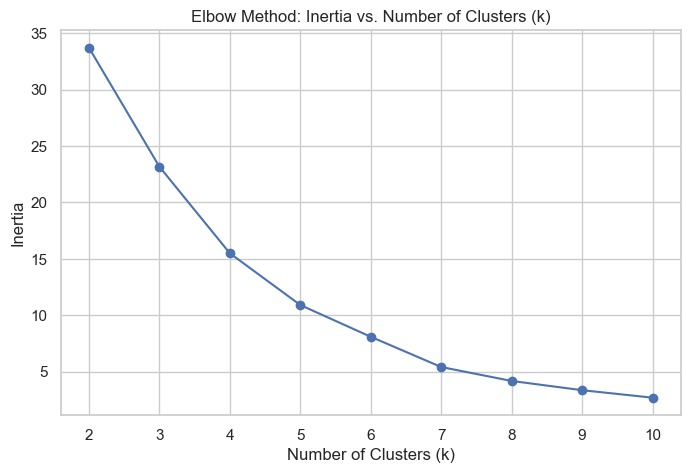

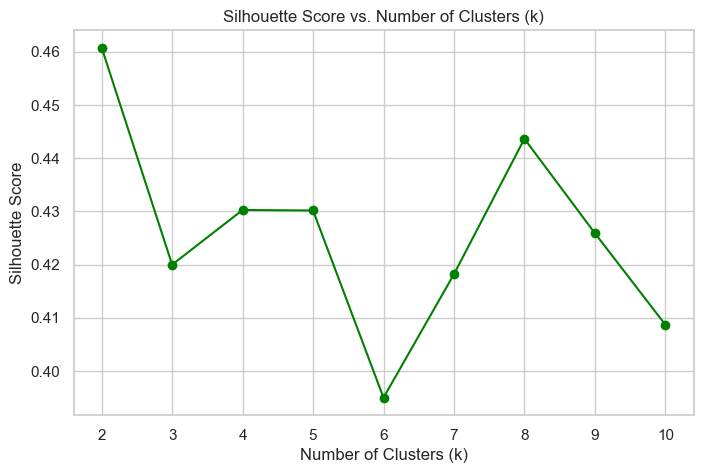

DBSCAN Cluster Counts (for each eps):


,0.5,0.7,1.0,1.2,1.5
-1,23,23,8,2,1
0,0,0,6,6,11
1,0,0,9,5,11
2,0,0,0,10,0


C:\Users\rosem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


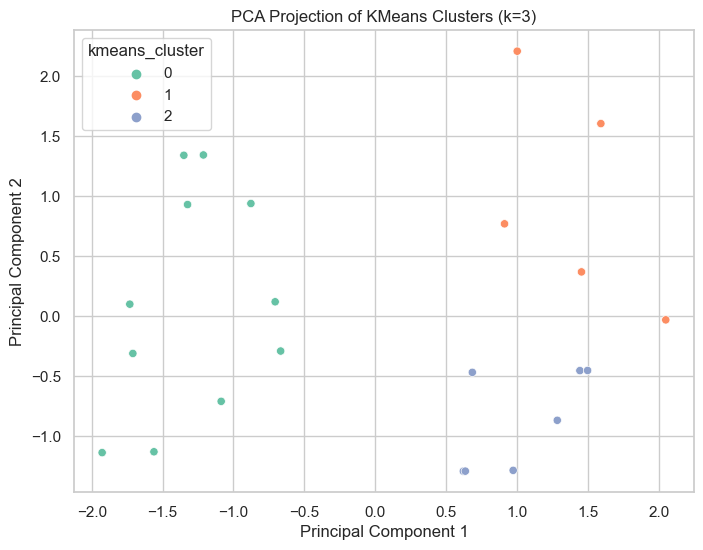

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load cleaned EV charging data
df = pd.read_csv("Cleaned_EV_Charging_Sessions.csv")  # Replace with your correct filename
features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
df = df.dropna(subset=features)

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Step 3: KMeans Evaluation (k = 2 to 10)
k_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method: Inertia vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Score Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Step 4: DBSCAN Tuning (eps values)
eps_values = [0.5, 0.7, 1.0, 1.2, 1.5]
dbscan_results = {}

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    dbscan_results[eps] = pd.Series(labels).value_counts().sort_index()

dbscan_summary = pd.DataFrame(dbscan_results).fillna(0).astype(int)
print("DBSCAN Cluster Counts (for each eps):")
display(dbscan_summary)

# Step 5: PCA Projection for KMeans with optimal k=3 (adjust if needed)
final_kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['kmeans_cluster'] = final_kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='kmeans_cluster', palette='Set2')
plt.title("PCA Projection of KMeans Clusters (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


Load the real cleaned dataset

Load or generate the synthetic dataset

Ensure consistent feature structure and data types

Merge both datasets into one

Optionally label the source (real or synthetic)

In [3]:
import pandas as pd
import numpy as np

# Step 1: Load real dataset
real_df = pd.read_csv("Cleaned_EV_Charging_Sessions.csv")
real_df = real_df[['chargeTimeHrs', 'hour', 'isWeekend', 'distance']]
real_df['source'] = 'real'

# Step 2: Generate synthetic dataset
n_samples = 1000
np.random.seed(42)
charge_duration = np.random.normal(1.0, 0.5, n_samples).clip(0.2, 5.0)
charge_hour = np.random.randint(0, 24, n_samples)
is_weekend = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])
distance = np.random.normal(15, 10, n_samples).clip(1, 100)

synthetic_df = pd.DataFrame({
    'chargeTimeHrs': charge_duration,
    'hour': charge_hour,
    'isWeekend': is_weekend,
    'distance': distance,
    'source': 'synthetic'
})

# Step 3: Merge both datasets
combined_df = pd.concat([real_df, synthetic_df], ignore_index=True)

# Check final structure
print(f"✅ Combined dataset shape: {combined_df.shape}")
print(combined_df['source'].value_counts())
combined_df.head()


✅ Combined dataset shape: (4395, 5)
source
real         3395
synthetic    1000
Name: count, dtype: int64


,chargeTimeHrs,hour,isWeekend,distance,source
0,1.510556,15.0,0,21.023826,real
1,2.177222,17.0,0,21.023826,real
2,4.671667,12.0,0,21.023826,real
3,1.768333,19.0,0,21.023826,real
4,0.298611,20.0,0,21.023826,real


saving the file

In [5]:
# Save to CSV
combined_df.to_csv("Combined_EV_Charging_Clustered.csv", index=False)

print("✅ Combined dataset with clusters saved as 'Combined_EV_Charging_Clustered.csv'")

from google.colab import files
files.download("Combined_EV_Charging_Clustered.csv")



✅ Combined dataset with clusters saved as 'Combined_EV_Charging_Clustered.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
print(combined_df.columns)


Index(['chargeTimeHrs', 'hour', 'isWeekend', 'distance', 'source'], dtype='object')


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from google.colab import files

# Step 1: Load combined dataset
df = pd.read_csv("Combined_EV_Charging_Clustered.csv")

# Step 2: Drop rows with missing values in key features
features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
df = df.dropna(subset=features).copy()

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Step 4: KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Save and download
output_filename = "Combined_EV_Charging_Clustered_With_Labels.csv"
df.to_csv(output_filename, index=False)
print(f"✅ File saved as: {output_filename}")

files.download(output_filename)


✅ File saved as: Combined_EV_Charging_Clustered_With_Labels.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualization for optimized data

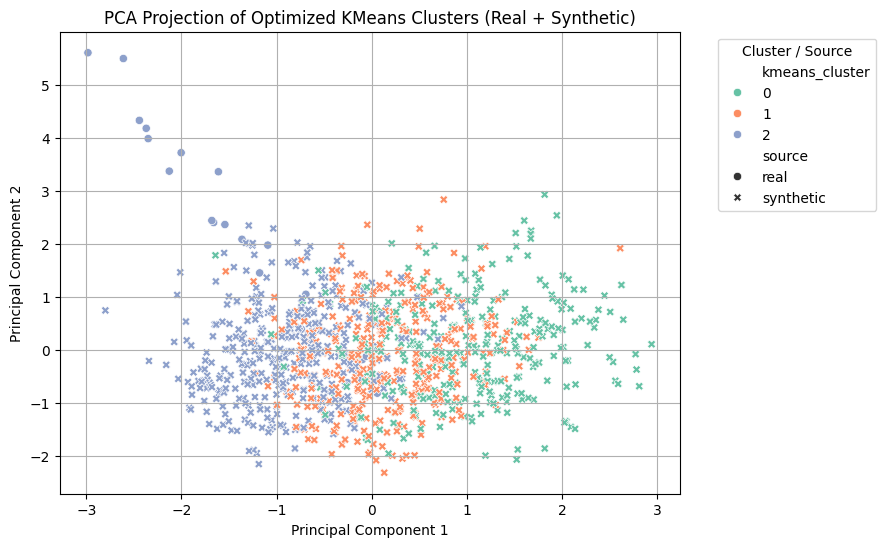

<ipython-input-11-2565ca882dd5>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='kmeans_cluster', y='chargeTimeHrs', palette='Set3')


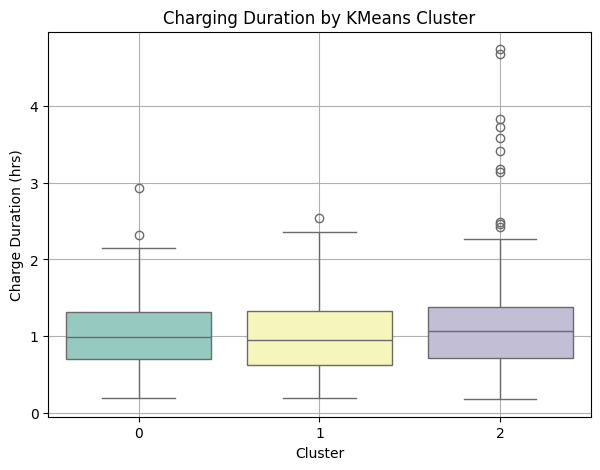

<ipython-input-11-2565ca882dd5>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kmeans_cluster', palette='Set2')


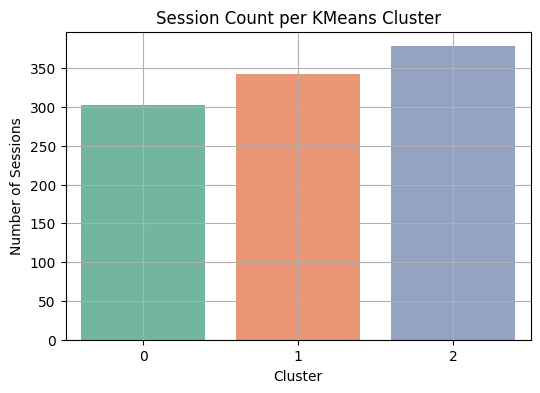

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the updated dataset
df = pd.read_csv("Combined_EV_Charging_Clustered.csv")  # Adjust path if needed

# Drop any missing rows in required features
features = ['chargeTimeHrs', 'hour', 'isWeekend', 'distance']
df = df.dropna(subset=features).copy()

# Re-scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Recompute KMeans if not already done
if 'kmeans_cluster' not in df.columns:
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

# PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# Plot 1: PCA Projection
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='kmeans_cluster', style='source', palette='Set2')
plt.title("PCA Projection of Optimized KMeans Clusters (Real + Synthetic)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Cluster / Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 2: Boxplot - Charging Duration per Cluster
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='kmeans_cluster', y='chargeTimeHrs', palette='Set3')
plt.title("Charging Duration by KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("Charge Duration (hrs)")
plt.grid(True)
plt.show()

# Plot 3: Barplot - Number of Sessions per Cluster
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='kmeans_cluster', palette='Set2')
plt.title("Session Count per KMeans Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Sessions")
plt.grid(True)
plt.show()
